In [64]:
from pathlib import Path

TEST_FOLDER = Path("tests")
SRC_FOLDER = Path("src")
BIN_FOLDER = Path("bin")
BIN_FILE = BIN_FOLDER / "TSP_greedy.exe"
TIMES_FILE = Path("results.csv")
print(TEST_FOLDER.absolute())

f:\Programowanie\Studia\OptymalizacjaKombinatoryczna\tests


In [65]:
import subprocess

def compile_src(filepath : Path, BIN_FOLDER : Path):
    cmd = ["g++", filepath, "-std=c++17","-o", f"{BIN_FOLDER / filepath.stem}.exe" ]
    p = subprocess.run(cmd, capture_output=True)
    print("Compiled: ", p.returncode, p.stdout.decode('utf-8'), p.stderr.decode('utf-8'))

for src_path in SRC_FOLDER.glob("*.cpp"):
    compile_src(src_path, BIN_FOLDER)



Compiled:  0  


In [66]:
import random

def generate_test(test_folder:Path, number):

    points = []
    for _ in range(number):
        x = random.uniform(0, 100)
        y = random.uniform(0, 100)
        
        while (x,y) in points:
            x = random.uniform(0, 100)
            y = random.uniform(0, 100)
            
        points.append((x,y))
    #print(points)
    #print(points)

    with open(test_folder / f"test_{number}.txt", 'w') as f:
        f.write(f"{number}\n")
        for (x, y) in points:
            f.write(f"{x} {y}\n")



generate_test(TEST_FOLDER, 10)



In [67]:
import csv

def run_test(test_path:Path):
    cmd = [str(BIN_FILE)]
    process = subprocess.run(cmd,capture_output=True, text=True, input=str(test_path.absolute()))
    return process.stdout.split()

with open(TIMES_FILE, 'w', newline='') as times_file:
    writer = csv.writer(times_file, delimiter=',')
    for test_file in TEST_FOLDER.glob("*.txt"):
        nodes = test_file.stem.split("_")[1]
        print("Nodes:", nodes)
        output = run_test(test_file)
        print(output)
        writer.writerow([nodes,*output])
        

Nodes: 10
['529.456', '1.70312;45.0227', '0.666018;73.2014', '25.9008;23.9036', '29.6203;61.8782', '17.584;86.8083', '47.6451;46.7602', '68.1674;62.0853', '62.9903;98.5953', '88.5768;69.7859', '99.8809;6.40808', '1.70312;45.0227']


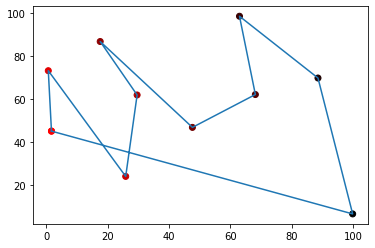

In [86]:
import matplotlib.pyplot as plt
import numpy as np

with open(TIMES_FILE, 'r') as csv_file:
    csv_data = list(csv.reader(csv_file, delimiter=','))

first_test = csv_data[0]


data = {}
data["nodes"] = int(first_test[0])
data["distance"] = float(first_test[1])
data["traveled_nodes"] = []

for row in first_test[2:]:
    x, y = row.split(';')
    data["traveled_nodes"].append((float(x), float(y)))

nodes = data["nodes"]
red = np.linspace(1, 0, nodes)

red = np.append(red, [1,0,0])

colors = list(zip(red, np.zeros(nodes+1), np.zeros(nodes+1)))
#print(colors)

x_cords, y_cords = zip(*data["traveled_nodes"])
#print(x_cords)
#print(y_cords)

plt.scatter(x_cords, y_cords, c=colors)
plt.plot(x_cords, y_cords)
#plt.plot(x_cords, y_cords, '-o')

plt.show()